# Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)


In [52]:
!pip install spacy
!pip install wordcloud

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [54]:
tweet=pd.read_csv("Elon_musk.csv",error_bad_lines=False)

In [55]:
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [56]:
tweet = [Text.strip() for Text in tweet.Text] # remove both the leading and the trailing characters
tweet = [Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False
tweet[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [57]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 45.7 MB 114 kB/s eta 0:00:01     |███████▏                        | 10.3 MB 3.2 MB/s eta 0:00:12
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [59]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_md')

one_block = tweet[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [60]:
one_block

'@joerogan @Spotify Great interview!'

In [61]:
for token in doc_block[0:20]:
    print(token, token.pos_)

@joerogan VERB
@Spotify ADJ
Great ADJ
interview NOUN
! PUNCT


In [62]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:25])

['@joerogan', 'interview']


In [68]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] 

,word,count
0,joerogan,1
1,interview,1


In [69]:
print(words_freq)

[('joerogan', 1), ('interview', 1)]


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

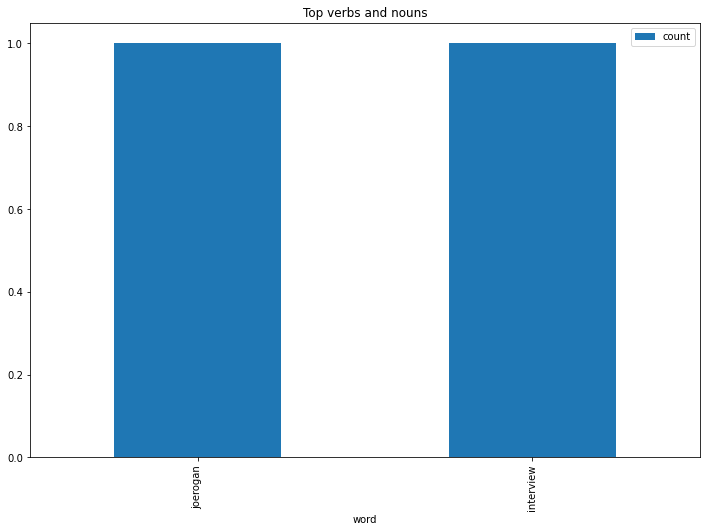

In [70]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# sentimental Analysis

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
tweet=pd.read_csv("Elon_musk.csv",error_bad_lines=False)
tweet = [Text.strip() for Text in tweet.Text] # remove both the leading and the trailing characters
tweet = [Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaguftajahan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweet))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [74]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can’t b… ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [75]:
#Emotion lexicon
afinn = pd.read_csv("Afinn.csv", sep=',', encoding='latin-1')
afinn.shape
 

(2477, 2)

In [76]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [77]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [78]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [79]:
# test that it works
calculate_sentiment(text = 'alien')

0

In [80]:
calculate_sentiment(text = 'interview')

0

In [83]:
calculate_sentiment(text = 'Great')

3

In [89]:
calculate_sentiment(text = 'Dumb')

-3

In [90]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [91]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [92]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",11,85
149,"@GUNMTLM3 @lexfridman No, but definitely this ...",11,45
222,"@PPathole @karpathy For a second there, I thou...",11,69
182,"Also, w… https://t.co/IYdKttVsqk @cleantechnic...",12,99
638,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
80,@teslaownersSV This is a good one @MrBeastYT I...,13,38
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven’t observed the… https://t.co/mez...,17,72


In [93]:
# Sentiment score of the tweets
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.424508
std        2.733367
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [94]:
 
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8


In [95]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [96]:
sent_df['index']=range(0,len(sent_df))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

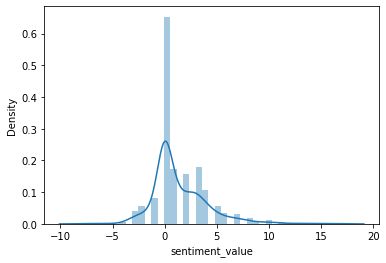

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

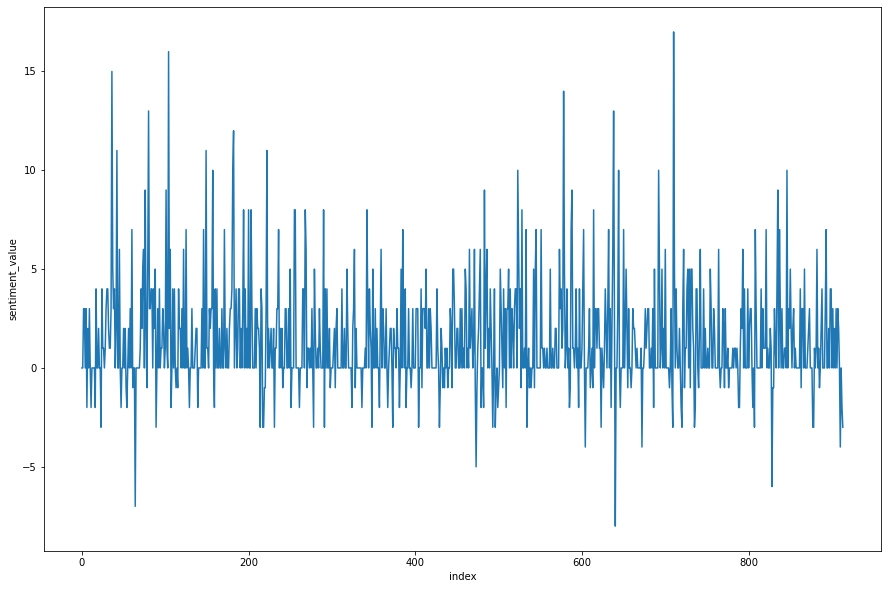

In [98]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

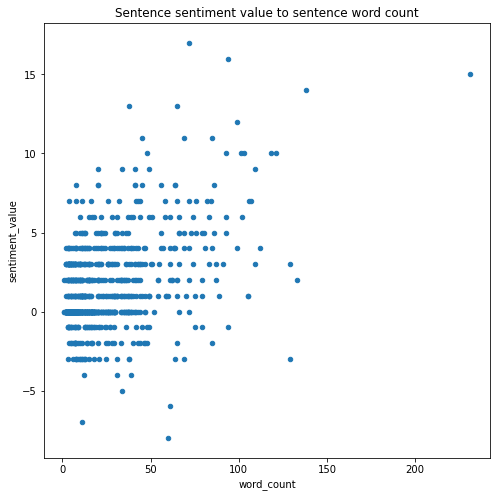

In [99]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')